In [16]:
%matplotlib inline
from ipywidgets import interact
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

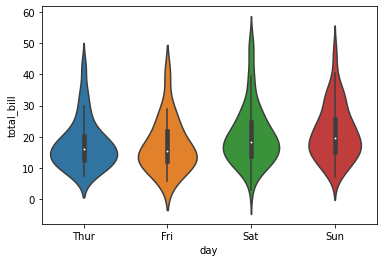

In [17]:
tips = sns.load_dataset("tips")
ax = sns.violinplot(x="day", y="total_bill", data=tips)

In [18]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


# Models

## Stakeholder Expectations and Needs Model


In [3]:
from visp.model import Stakeholder, Expectation, Need

stakeholders = [
    Stakeholder(name="Jane Doe",
                description="Marketing Leader for EMEA",
                role="Marketing Leader",
                organization="Internal"),
    Stakeholder(name="John Smith",
                description="Project Manager for the component development",
                role="Project Manager",
                organization="Internal")
]

stakeholder_expections = ['it want it pink','make it cheap']

stakeholder_needs = [
    Need(
        name="Move cursor",
        description="Move cursor on the screen",
        stakeholder="external",
        category="functional"
    ),
    Need(
        name="Single hand",
        description="Operated with one hand",
        stakeholder="external",
        category="performance"
    ),
    Need(
        name="Branding",
        description="Follow branding guidelines",
        stakeholder="internal",
        category="soft"
    )
]

In [4]:
stakeholders[1]

<Stakeholder: name=John Smith, description=Project Manager for the component development, role=Project Manager, organization=Internal>

## Product Architecture Model
Inputs: Standards/Regulations

Outputs: Structure, Design Variables (x), Soft Attributes (s)

In [5]:
from visp.model import DesignSolution, Interaction, Parameter
#TODO define component class (modules, parts), they have design variables (x) and soft attributes (s)
#TODO define interface class
#TODO define structure class as digraph

product_components = ['Component1','Component2','Component3']
product_interfaces = ['Interface1','Interface2']
product_structure = [product_components, product_interfaces]

design_variables = [
    {
        'name':'x1',
        'description':'A design variable',
        'type':'number',
        'min':0,
        'max':100,
        'value':50
    },
    {
        'name':'x2',
        'description':'A second design variable',
        'type':'number',
        'min':0,
        'max':100,
        'value':70
    },
    {
        'name':'x3',
        'description':'A third design variable',
        'type':'option',
        'value':50
    }
]

soft_attributes = [
    {
        'name':'Something soft',
        'value':'It is good'
    }
]

In [6]:
a = Parameter("hello", min=0)
print(a)

<Parameter: name=hello, description=None>


# Engineering Performance Model
Inputs: technology, design variables (x)

Outputs: performance attributes (f)

In [7]:
#TODO define technology class
#TODO define design variable class
#TODO defina performance attribute class

def engineering_performance_model(design_variables):
    performance_attributes = [
        {
            'name':'f1',
            'description':'A performance attribute',
            'type':'number',
            'min':0,
            'max':100,
            'value':50
        },
        {
            'name':'f2',
            'description':'A second performance attribute',
            'type':'boolean',
            'value':True
        }
    ]
    return performance_attributes

performance_attributes = engineering_performance_model(design_variables)

for attribute in performance_attributes:
    print(attribute['name'],attribute['value'])

f1 50
f2 True


# Product Value Model
Inputs: Stakeholders, Performance Attributes (f), Soft Attributes (s)

Outputs: Value (V)

Consider:
- How well does the product fulfill the needs of the stakeholders?
- How well does it in regards to the functional needs, the performance needs and the soft needs?
- How satisfied each of the stakeholders is with the solution?

In [8]:
#TODO define Value Dimension class
#TODO define Value Driver class
#TODO define Value Creation Strategy class

def product_value(stakeholder_needs, performance_attributes, soft_attributes):
    if (performance_attributes + soft_attributes) > stakeholder_needs:
        value = 100
    else:
        value = 0
    return value

value = product_value(stakeholder_needs, performance_attributes, soft_attributes)
print(value)

TypeError: '>' not supported between instances of 'dict' and 'Need'

# Market Demand Model
Inputs: Product Value (V), Competition, Price (P)

Output: Demand (D)

In [9]:

def demand(value,competition,price):
    V = value
    P = price
    D = (100 * V) - (90 * P)
    return D

In [10]:
def plot_demand(value,competition,price):
    D = demand(value,competition,price)
    print(D)
    sns.histplot(np.random.normal(D, 1, 100),kde=True)
    plt.show()
interact(plot_demand, value = (1,10), competition = (1,10), price = (1,10))

interactive(children=(IntSlider(value=5, description='value', max=10, min=1), IntSlider(value=5, description='…

<function __main__.plot_demand(value, competition, price)>

# Manufacturing Cost Model
Inputs: Structure, Raw materials, Labor rates, Suppliers, Demand

Outputs: Variable Costs (C)

In [11]:

def variable_cost(product_structure, demand):
    return 10 * demand

# Finance Model
Inputs: Demand (D), Variable Cost (C), Fixed Cost (F), Interest Rate, Price

Outputs: Profit

In [12]:

def profit(demand, variable_cost, fixed_cost, interest_rate, price):
    profit = (demand * price) - (demand * variable_cost) - fixed_cost
    print (profit)
    return profit

In [13]:
profit(50,30,500,0,40)

0


0

In [14]:
import ipywidgets as widgets

In [15]:
demand_slider =        widgets.FloatSlider(min=0,
                                           max=1000000,
                                           default_value=100000,
                                           description="Demand: ",
                                           layout=widgets.Layout(width='auto', height='auto'))

variable_cost_slider = widgets.FloatSlider(min=0,
                                           max=50000,
                                           default_value=30000,
                                           description="Variable Cost: ",
                                           layout=widgets.Layout(width='auto', height='auto'))

fixed_cost_slider =     widgets.FloatSlider(min=0,
                                            max=10000,
                                            default_value=5000,
                                            description="Fixed Cost: ",
                                            layout=widgets.Layout(width='auto', height='auto'))

interest_rate_slider =  widgets.FloatSlider(min=-5,
                                            max=15,
                                            default_value=2,
                                            description="Interest Rate: ",
                                            layout=widgets.Layout(width='auto', height='auto'))

price_slider =          widgets.FloatSlider(min=0, 
                                            max=100000,
                                            default_value=40000,
                                            description="Price: ",
                                            layout=widgets.Layout(width='auto', height='auto'))

ui = widgets.VBox([demand_slider,
                   variable_cost_slider,
                   fixed_cost_slider,
                   interest_rate_slider,
                   price_slider])


out = widgets.interactive_output(profit, {'demand': demand_slider,
                                          'variable_cost': variable_cost_slider,
                                          'fixed_cost': fixed_cost_slider,
                                          'interest_rate': interest_rate_slider,
                                          'price': price_slider})

display(ui, out)

Output()